In [6]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px

from random import Random

# Input Data

In [7]:
# Number of random samples
nsample = 10000
# Discount rate : WACC between 3 and 8%
r = np.random.uniform(0.03,0.08,nsample)
# Production period from Table A1.1 (IRENA 2020)
production_period = 25
# Electric power [W]
power_electric = 2e6
# Load Factor : France [2010 - 2020] -> [26 -> 32]% (IRENA 2020)
loadfactor = np.random.uniform(0.26,0.32,nsample)
# Total Installed cost ranges and weighted averages for onshore wind projects for Europe (IRENA 2020)
# [q5 - med - q95] = [1174 - 1515 - 2064] $2020 / kW
dollar_to_euro = 0.85
mu, sigma = 1515*dollar_to_euro, 180 # order of magnitude...
cost_construction_occ = np.random.normal(mu,sigma,nsample) * power_electric*1e-3
# Weighted-average O&M costs from IRENA 2020
# ON SHORE = [20 - 80] $2020/kW/an
cost_fix_om = np.random.uniform(20,80,nsample) * dollar_to_euro * power_electric*1e-3

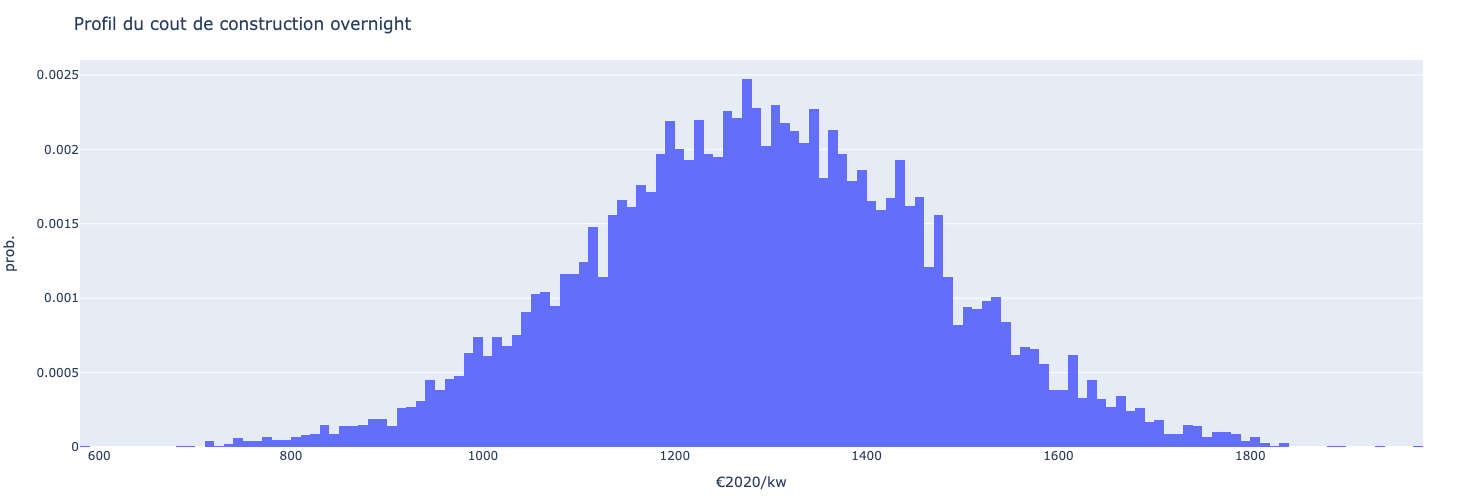

In [8]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=cost_construction_occ/(power_electric*1e-3),name="OCC",histnorm='probability density'))

fig.update_layout(title="Profil du cout de construction overnight",
                  xaxis_title="€2020/kw",
                  yaxis_title="prob.",
                  width=1000,
                  height=500,
                  margin=dict(l=50,r=50,b=30,t=60),
                  legend=dict(y=0.85,x=0.75)
                 )                 

# LCOE Calculation

In [11]:
df = pd.DataFrame(columns = ['dr','lt','ep','lf','cc','omc','lcoe','om_f','c_f'])

for s in list(range(nsample)):
    levelized_energy = 0
    levelized_cost_om = 0
    for t in list(range(production_period)):
        levelized_energy += power_electric * loadfactor[s] * 1e-6 * 365.25 * 24. / (1 + r[s])**(t+0.5)
        levelized_cost_om += cost_fix_om[s] / (1 + r[s])**(t+0.5)
    levelized_cost = cost_construction_occ[s] + levelized_cost_om
    om_frac = levelized_cost_om / levelized_cost
    cons_frac = cost_construction_occ[s] / levelized_cost
    lcoe = levelized_cost / levelized_energy

    to_append = [r[s],production_period,power_electric,loadfactor[s],cost_construction_occ[s],cost_fix_om[s],lcoe,om_frac,cons_frac]
    df.loc[len(df)] = to_append


# Plotting

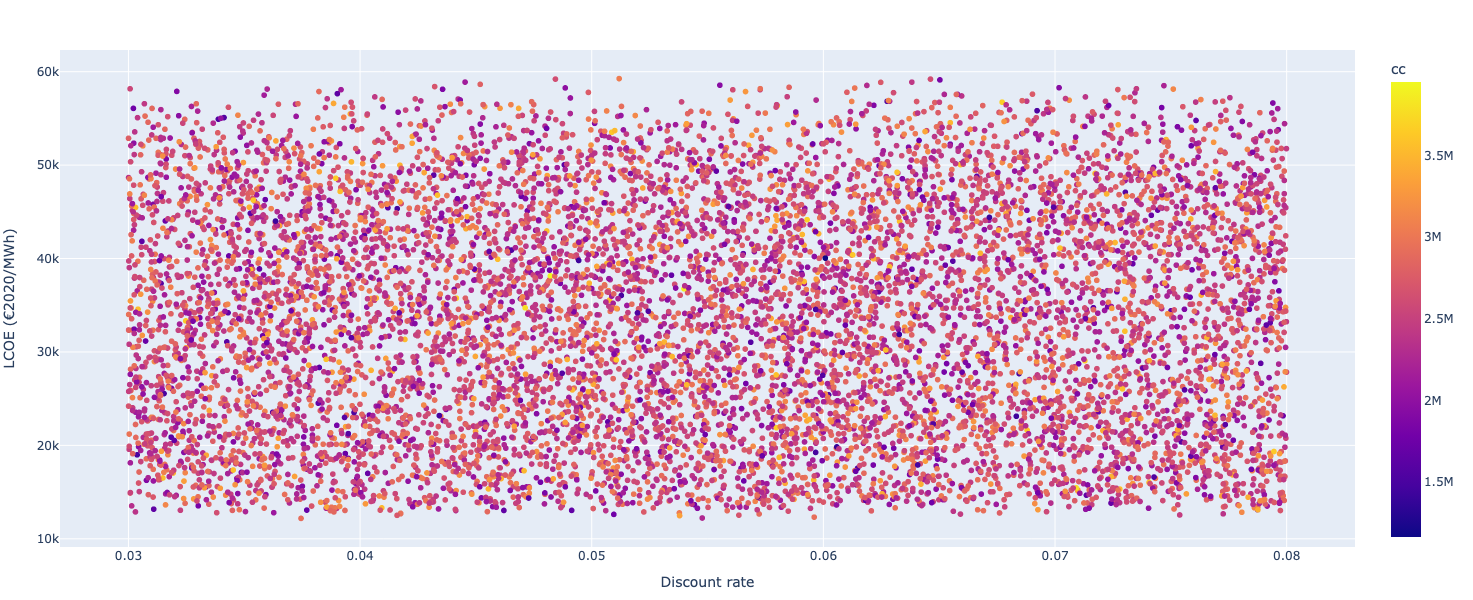

In [10]:
fig = px.scatter(df, x="dr", y="lcoe", color="cc", log_x=False)
fig.update_xaxes(title="Discount rate")
fig.update_yaxes(title="LCOE (€2020/MWh)")
    
fig.update_layout(width=800,height=600,margin=dict(l=50,r=50,b=30,t=50))

fig.show()